# Lab 4: More Data Analysis with Airbnb

This week, we will look at some airbnb listing data.

In [1]:
options(repr.plot.width=8, repr.plot.height=4)

library(dplyr)
library(ggplot2)

load(url("https://raw.githubusercontent.com/rogerfan/stats306_f18_labs/master/airbnb_dat.Rdata"))

Warning message:
“package ‘dplyr’ was built under R version 3.4.4”
Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



`airbnb_dat.Rdata` contains two dataframes: `listing` and `demo`. Let's take a look.
`listing` basically has all the info you would find on a rental page:

In [2]:
glimpse(listing)
head(listing)

Observations: 23,624
Variables: 29
$ accommodates                <dbl> 2, 2, 6, 1, 2, 2, 2, 2, 3, 1, 2, 4, 3, ...
$ amenities                   <chr> "{}", "{\"Wireless Internet\",\"Air con...
$ availability_30             <int> 29, 18, 3, 0, 6, 22, 10, 0, 3, 20, 17, ...
$ bathrooms                   <dbl> 1.0, 1.0, 1.0, 1.0, 1.0, NA, 1.5, 1.0, ...
$ bed_type                    <chr> "Real Bed", "Real Bed", "Real Bed", "Re...
$ bedrooms                    <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
$ beds                        <dbl> 1, 1, 3, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, ...
$ cancellation_policy         <chr> "flexible", "flexible", "flexible", "fl...
$ city                        <chr> "palmdale", "acton", "acton", "los ange...
$ has_availability            <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,...
$ host_id                     <int> 44800067, 84615808, 71743973, 41646908,...
$ id                          <int> 8909380, 14078522, 13006928, 7898757, 1...
$ instant_bookabl

accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,⋯,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode
2,{},29,1,Real Bed,1,1,flexible,palmdale,NA,⋯,10,10,10,9,93,9,Private room,CA,,93550
2,"{""Wireless Internet"",""Air conditioning"",""Wheelchair accessible"",Kitchen,""Free parking on premises"",""Pets allowed"",""Pets live on this property"",Heating,Washer,Dryer,Essentials,Shampoo,Hangers}",18,1,Real Bed,1,1,flexible,acton,NA,⋯,10,10,10,10,100,10,Private room,CA,,93510
6,"{TV,""Wireless Internet"",""Air conditioning"",Pool,Kitchen,""Free parking on premises"",""Pets allowed"",Breakfast,""Pets live on this property"",Dog(s),""Hot tub"",""Indoor fireplace"",Heating,""Family/kid friendly"",""Suitable for events"",Washer,Dryer,""Smoke detector"",Essentials,Shampoo,""24-hour check-in"",Hangers}",3,1,Real Bed,1,3,flexible,acton,NA,⋯,10,10,10,10,100,10,Entire home/apt,CA,,93510
1,"{Internet,""Wireless Internet"",Kitchen,""Free parking on premises"",Washer,Dryer,""Smoke detector"",Essentials,Shampoo}",0,1,Real Bed,1,1,flexible,los angeles,NA,⋯,10,9,10,9,93,10,Private room,CA,,90007
2,"{Internet,""Wireless Internet"",""Free parking on premises"",""Fire extinguisher"",Essentials,""Lock on bedroom door"",""Laptop friendly workspace"",""translation missing: en.hosting_amenity_49"",""translation missing: en.hosting_amenity_50""}",6,1,Real Bed,1,1,moderate,los angeles,NA,⋯,10,10,10,10,98,10,Private room,CA,,90007
2,"{TV,Internet,""Wireless Internet"",Kitchen,Washer,Dryer}",22,NA,Real Bed,1,1,strict,los angeles,NA,⋯,9,8,9,8,89,9,Private room,CA,$320.00,90007


While demographic information by zip code is in `demo`:

In [7]:
head(demo)

zipcode,population,median_household_income,mean_household_income
601,17982,10816,20349
602,40260,16079,23282
603,52408,16804,26820
606,6331,12512,15730
610,28328,17475,23360
612,64816,17229,25590


### Goal: 
Airbnb is meant for home sharing, but there are hosts with more than 20 listings. These are more like commercial hotels without regulation than home sharing. We would like to identify such users and see what their impact is on the airbnb ecosystem.

### Step 1:
`host_id` is a unique identifier for host. `id` is a unique identifier for each listing. Construct a table where for each `host_id`, we have the number of unique `id`s, and the mean `review_scores_value` for that `host_id`. Call this table `tb1`. Name the 3 resulting columns `host_id`, `nid`, and `mean_review`.

In [6]:
tb1 = listing %>% group_by(host_id) %>%
    summarize(nid = n_distinct(id),    # or nid = n()
              mean_review = mean(review_scores_value))

head(tb1)

host_id,nid,mean_review
59,1,10.0
521,1,8.0
767,1,8.0
1158,1,10.0
3041,2,8.5
3144,1,10.0


### Step 2:

* Create plot of boxplots, where the x axis is `nid`, and y axis is `mean_review`. Like the one in [lecture 7](https://github.com/terhorst/stats306/blob/master/lecture07/Lecture07.ipynb) right above the violin plot.
* Create a scatter plot of `mean_review` vs `nid`, add a smooth fitted line.
 
What do you see? What are the things that you can pick off from one plot but not the other?

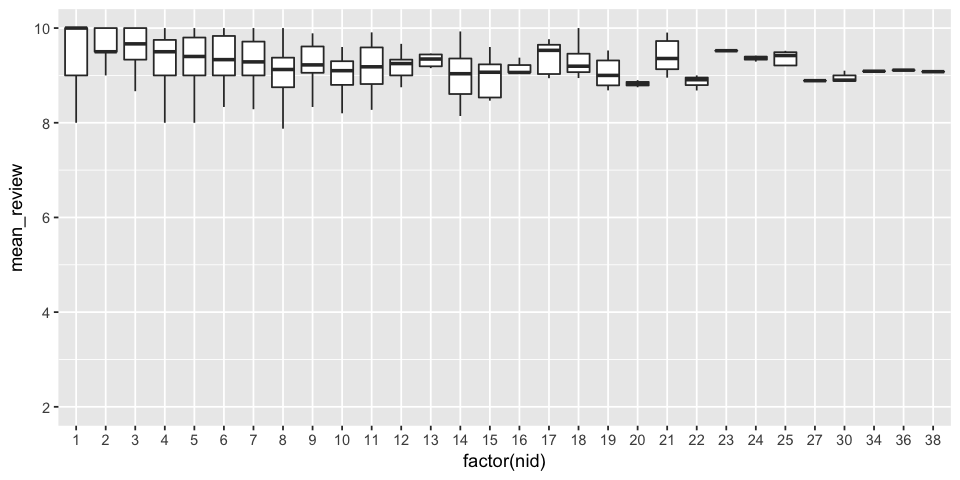

In [8]:
ggplot(tb1, aes(x=factor(nid), y=mean_review)) +
    geom_boxplot(, outlier.shape=NA)

`geom_smooth()` using method = 'gam'


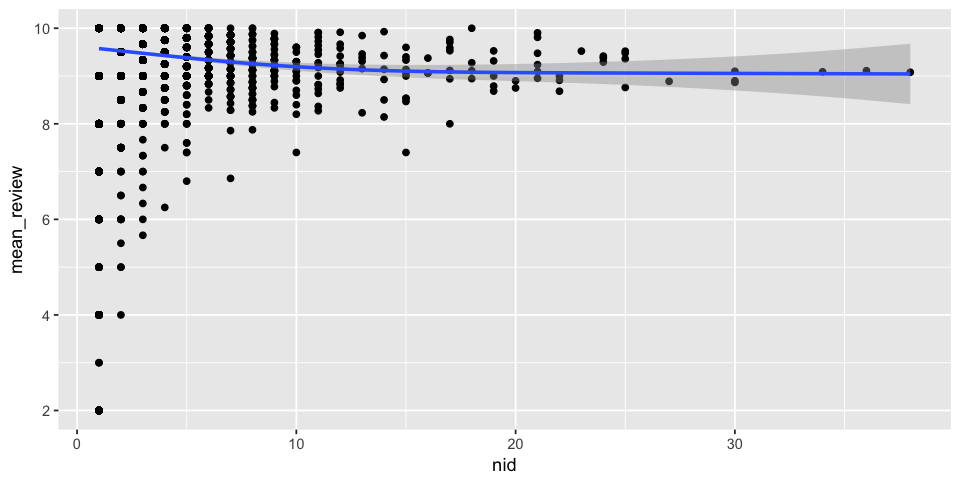

In [9]:
ggplot(tb1, aes(x=nid, y=mean_review)) +
    geom_point() + geom_smooth()

### Step 3:
Let's define commercial hosts to be hosts with >= 5 listings. Create a table called `tb3` that is `listing` with an extra column called `if_commer` indicating if this row has a commercial host. 

Hint: There are two ways to do this. One involving an operation on `tb1` and merging back onto `listing` or one directly doing operations on `listing` without a merge. See if you can figure out both methods.

In [16]:
tb3 = NA

temptable = tb1 %>% mutate(if_commer = nid >= 5) %>% 
    select(host_id, if_commer)
tb3 = listing %>% left_join(temptable)

tb3 = listing %>% group_by(host_id) %>%
    mutate(nid = n_distinct(id)) %>%
    mutate(if_commer = nid >= 5)


Joining, by = "host_id"


### Step 4:
Using `tb3`, find for each zipcode, the total number of listings, the number of commercial listings (any listing by a commercial host is a commercial listing), and the mean price of all listings; retain only rows with more than 25 listings. Name this table `tb4`, name the four columns `zipcode`, `nlist`, `ncomlist`, and `meanprice`.

In [19]:
tb4 = tb3 %>% group_by(zipcode) %>%
    summarize(nlist=n(),
              ncomlist = sum(if_commer),
              mean=mean(price, na.rm=TRUE)) %>%
    filter(nlist > 25)
head(tb4)

zipcode,nlist,ncomlist,mean
,249,24,134.32114
90004,290,62,115.34028
90005,195,69,90.78351
90006,279,185,60.90323
90007,113,41,59.18584
90008,46,1,111.21739


### Step 5:
In `tb4`, add a column of indicating if this zipcode is "commercial heavy". We define commercial heavy as the number commercial listings exceeding 20% of the total amount of listings.

In [20]:
tb4 = tb4  %>% mutate(com_heavy = (ncomlist/nlist) > 0.2)
head(tb4)

zipcode,nlist,ncomlist,mean,com_heavy
,249,24,134.32114,FALSE
90004,290,62,115.34028,TRUE
90005,195,69,90.78351,TRUE
90006,279,185,60.90323,TRUE
90007,113,41,59.18584,TRUE
90008,46,1,111.21739,FALSE


### Step 6:
Merge the data in `demo` into `tb4`. Name this table `tb5`.

In [22]:
head(tb4)
head(demo)
tb5 = tb4 %>% left_join(demo, by='zipcode')
head(tb5)

zipcode,nlist,ncomlist,mean,com_heavy
,249,24,134.32114,FALSE
90004,290,62,115.34028,TRUE
90005,195,69,90.78351,TRUE
90006,279,185,60.90323,TRUE
90007,113,41,59.18584,TRUE
90008,46,1,111.21739,FALSE


zipcode,population,median_household_income,mean_household_income
601,17982,10816,20349
602,40260,16079,23282
603,52408,16804,26820
606,6331,12512,15730
610,28328,17475,23360
612,64816,17229,25590


zipcode,nlist,ncomlist,mean,com_heavy,population,median_household_income,mean_household_income
,249,24,134.32114,FALSE,NA,NA,NA
90004,290,62,115.34028,TRUE,64008,40612,72532
90005,195,69,90.78351,TRUE,38979,31142,45224
90006,279,185,60.90323,TRUE,61625,31521,39123
90007,113,41,59.18584,TRUE,43426,22304,33382
90008,46,1,111.21739,FALSE,31837,36564,56076


### Step 7:
Create a scatter plot of mean price vs median household income with `tb5`. Color points by if this zipcode is commercial heavy. Add a smoothing line. What do you see? What do you learn from this plot?

`geom_smooth()` using method = 'loess'
Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

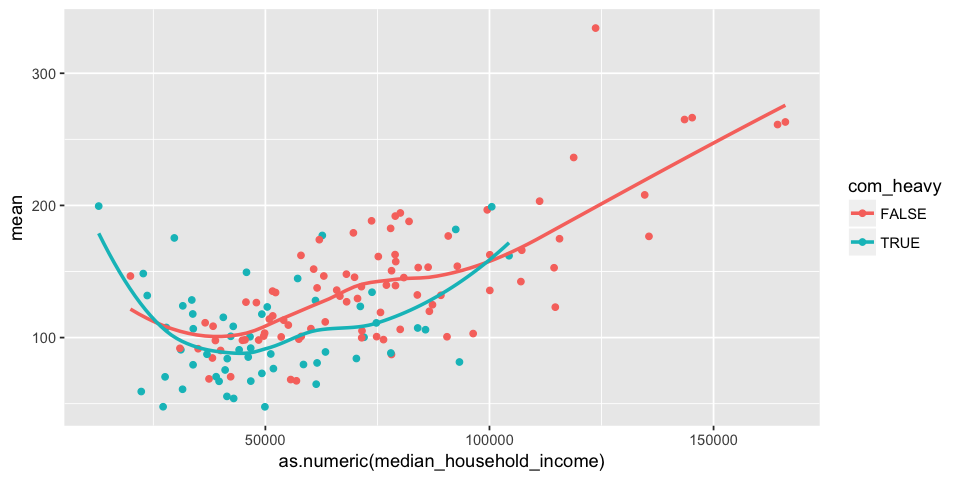

In [26]:
ggplot(tb5, aes(x=as.numeric(median_household_income), y=mean, color=com_heavy)) +
    geom_point() + geom_smooth(se=FALSE)